A quick python parser for the data from the excellent website https://energy-charts.info/index.html?l=en&c=UK

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from functions.plot_prod import plot_prod

In [2]:
sns.set_style("whitegrid")

Matplotlib does not like the little legend hack we do in the plot_prod function, so we deactivate warnings.

In [3]:
import warnings
warnings.filterwarnings('ignore')

Single area graph with options for cumulative, rolling average, etc.
Pick country, year, and it plots the production (and load, if chosen).

https://energy-charts.info/charts/energy/raw_data/de/day_2015.json
https://energy-charts.info/charts/energy/data/de/day_2019.json
https://energy-charts.info/charts/energy/data/de/day_2020.json
https://energy-charts.info/charts/energy/data/de/day_2021.json


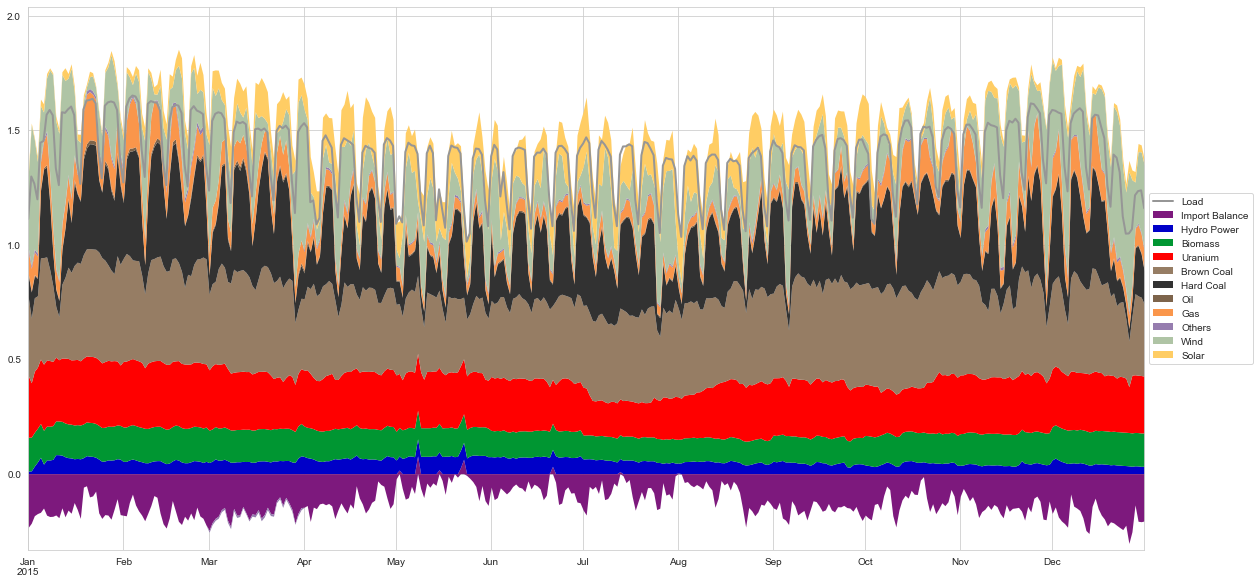

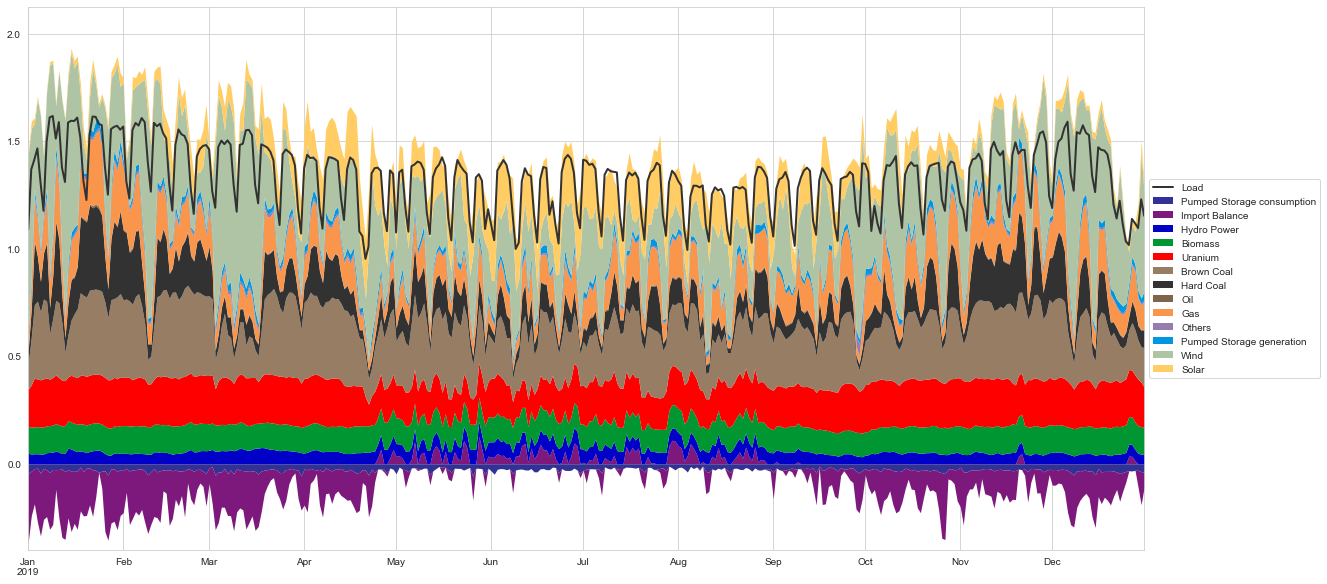

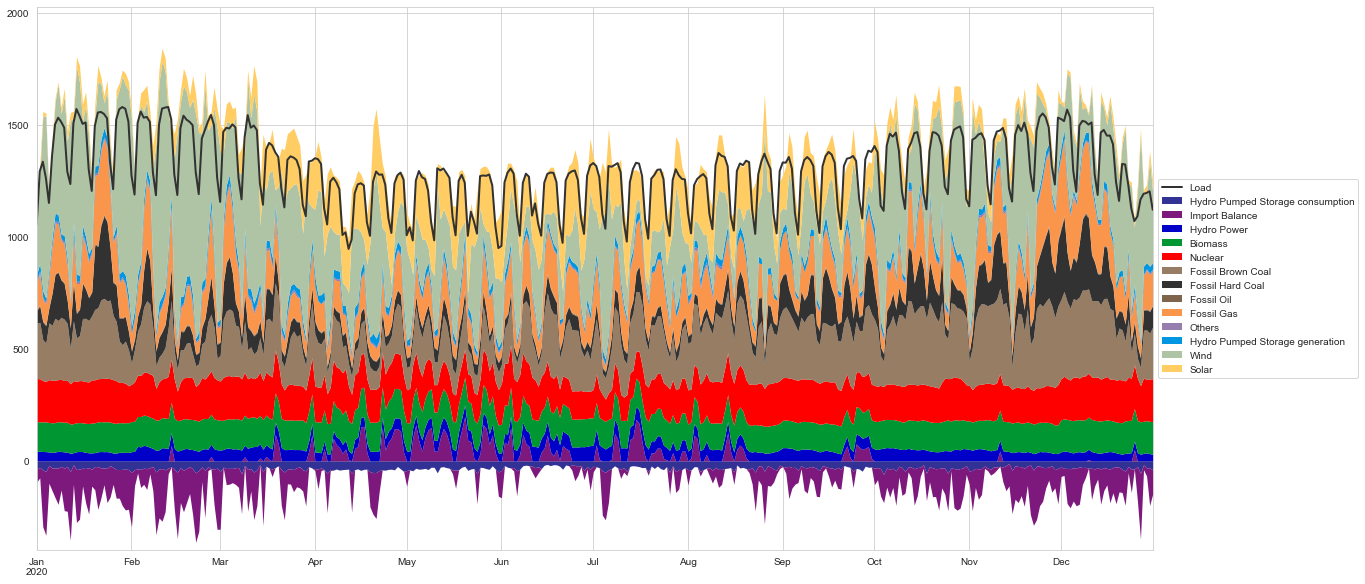

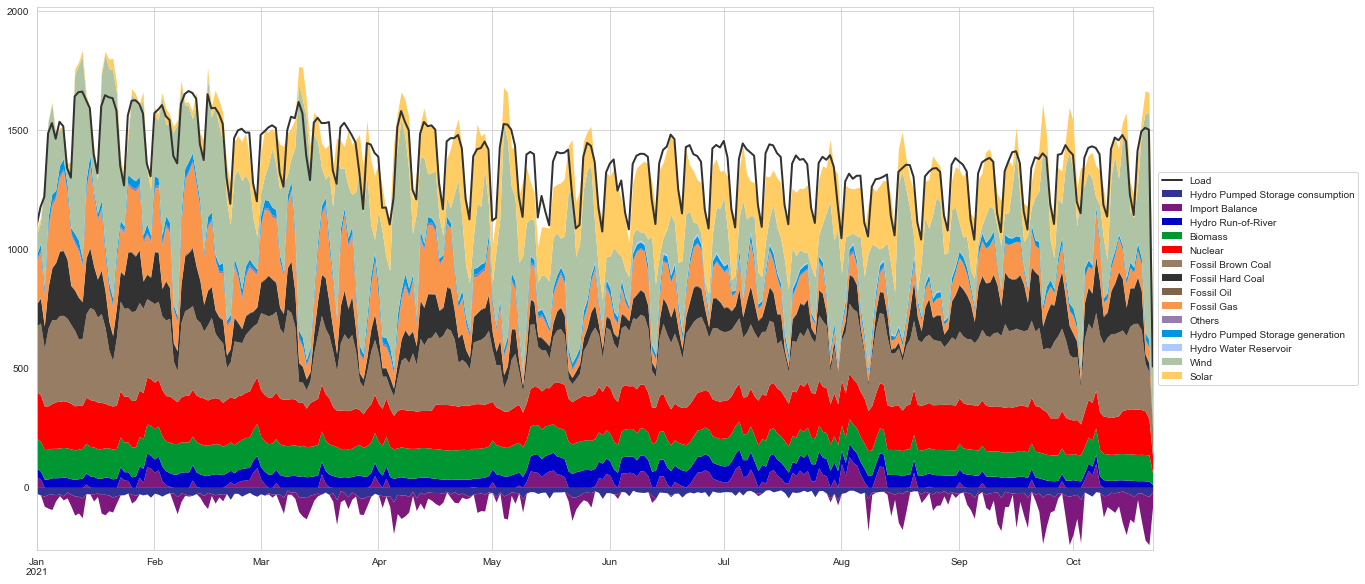

In [4]:
rolling=1
country='de'

prod_df_2015, load_df, colors_2015 = plot_prod(country=country, # country code
                             year='2015',  # year
                             display=True, # display chart (or just save data)
                             load=True,    # show load
                             cumul=False,  # cumulative
                             rolling=rolling,   # rolling average, in timesteps
                             lang='en')    # language
# prod_df_2018, load_df, colors = plot_prod(country=country, # country code
#                              year='2018',  # year
#                              display=True, # display chart (or just save data)
#                              load=True,    # show load
#                              cumul=False,  # cumulative
#                              rolling=rolling,   # rolling average, in timesteps
#                              lang='en')    # language
prod_df_2019, load_df, _ = plot_prod(country=country, # country code
                             year='2019',  # year
                             display=True, # display chart (or just save data)
                             load=True,    # show load
                             cumul=False,  # cumulative
                             rolling=rolling,   # rolling average, in timesteps
                             lang='en')    # language
prod_df_2020, load_df, _ = plot_prod(country=country, # country code
                             year='2020',  # year
                             display=True, # display chart (or just save data)
                             load=True,    # show load
                             cumul=False,  # cumulative
                             rolling=rolling,   # rolling average, in timesteps
                             lang='en')    # language
prod_df_2021, load_df, colors_2021 = plot_prod(country=country, # country code
                             year='2021',  # year
                             display=True, # display chart (or just save data)
                             load=True,    # show load
                             cumul=False,  # cumulative
                             rolling=rolling,   # rolling average, in timesteps
                             lang='en')    # language

Compare current year with average

In [5]:
prod_df_2015.columns

Index(['Import Balance', 'Hydro Power', 'Biomass', 'Uranium', 'Brown Coal',
       'Hard Coal', 'Oil', 'Gas', 'Others', 'Wind', 'Solar'],
      dtype='object')

In [6]:
set(prod_df_2021.columns) ^ set(prod_df_2015.columns)

{'Brown Coal',
 'Fossil Brown Coal',
 'Fossil Gas',
 'Fossil Hard Coal',
 'Fossil Oil',
 'Gas',
 'Hard Coal',
 'Hydro Power',
 'Hydro Pumped Storage consumption',
 'Hydro Pumped Storage generation',
 'Hydro Run-of-River',
 'Hydro Water Reservoir',
 'Nuclear',
 'Oil',
 'Uranium'}

In [7]:
colors = {**colors_2015, **colors_2021}

In [8]:
prod_df_2019.columns = prod_df_2020.columns

In [9]:
av_1820 = (
    prod_df_2015.reset_index().drop('index',axis=1)*2 + 
    prod_df_2019.reset_index().drop('index',axis=1)*0 + 
    prod_df_2020.reset_index().drop('index',axis=1)*0
    )/2

In [10]:
delta = (prod_df_2020.reset_index().drop('index',axis=1)-av_1820.reset_index().drop('index',axis=1))
delta.index = prod_df_2020.index

ratio = (prod_df_2020.reset_index().drop('index',axis=1)/av_1820.reset_index().drop('index',axis=1) - 1)
ratio.index = prod_df_2020.index

In [11]:
share_diff_2020 = prod_df_2020.sum()/prod_df_2020.sum().sum() - av_1820.sum()/av_1820.sum().sum()
share_diff_2021 = prod_df_2021.sum()/prod_df_2021.sum().sum() - av_1820.sum()/av_1820.sum().sum()

In [12]:
delta_sum = delta.groupby(pd.Grouper(freq='M')).sum()
delta_sum.index = delta_sum.index.strftime('%B')

In [13]:
ratio_sum = (prod_df_2020.groupby(pd.Grouper(freq='M')).sum()/
             av_1820.set_index(prod_df_2020.index).groupby(pd.Grouper(freq='M')).sum() - 1)
ratio_sum.index = ratio_sum.index.strftime('%B')

<AxesSubplot:title={'center':'Monthly production difference 2021 vs. 2015 mean, in GWh, UK, data ENTSOE'}>

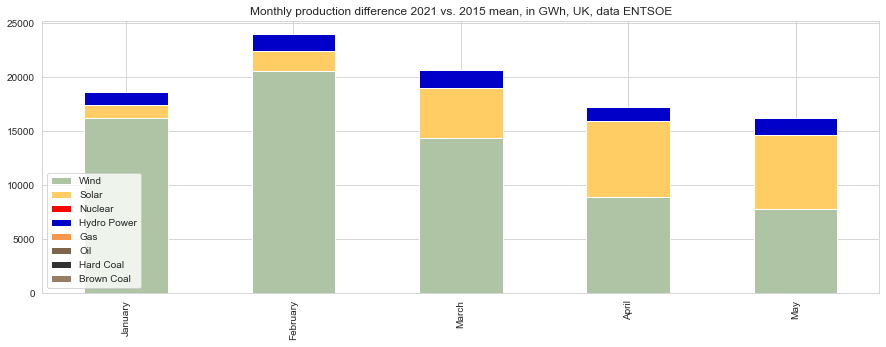

In [14]:
techs = ['Wind',
           'Solar',
           'Nuclear',
          'Hydro Power',
           'Gas',
           'Oil',
           'Hard Coal',
        'Brown Coal']

delta_sum[techs].iloc[:5,:].plot.bar(stacked=True,
                                        color=colors,
                                         figsize=(15,5),
                                        title='Monthly production difference 2021 vs. 2015 mean, in GWh, UK, data ENTSOE')

<AxesSubplot:title={'center':'Monthly production difference 2021 vs. 2015 mean, in GWh, UK, data ENTSOE'}>

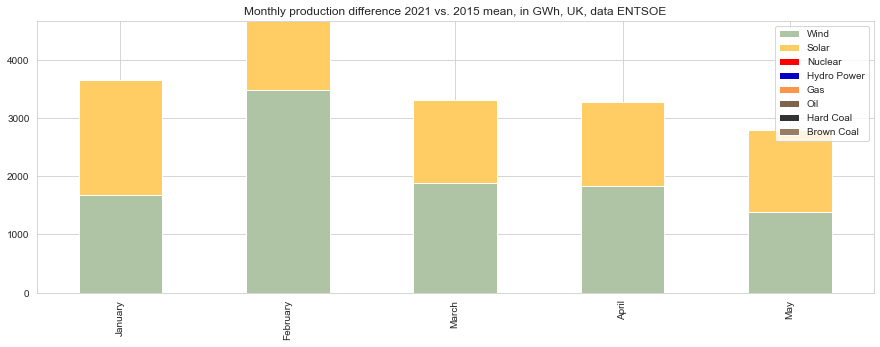

In [15]:
ratio_sum[techs].iloc[:5,:].plot.bar(stacked=True,
                                        color=colors,
                                         figsize=(15,5),
                                        title='Monthly production difference 2021 vs. 2015 mean, in GWh, UK, data ENTSOE')

In [16]:
pd.concat([share_diff_2020[techs],
           share_diff_2021[techs]],
          axis=1,
          keys=['GB 2020 vs. 2015', 'GB 2021 (Jan-May) vs. 2015'])

,GB 2020 vs. 2015,GB 2021 (Jan-May) vs. 2015
Wind,-0.280858,-0.336838
Solar,-0.165226,-0.148788
Nuclear,0.130299,0.134910
Hydro Power,-0.105490,NaN
Gas,NaN,NaN
Oil,NaN,NaN
Hard Coal,NaN,NaN
Brown Coal,NaN,NaN


<AxesSubplot:>

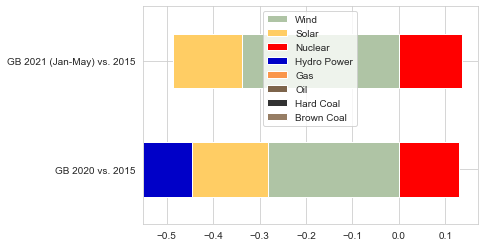

In [17]:
pd.concat([share_diff_2020[techs],
           share_diff_2021[techs]],
          axis=1,
          keys=['GB 2020 vs. 2015', 'GB 2021 (Jan-May) vs. 2015']).T.plot.barh(stacked=True,color=colors)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


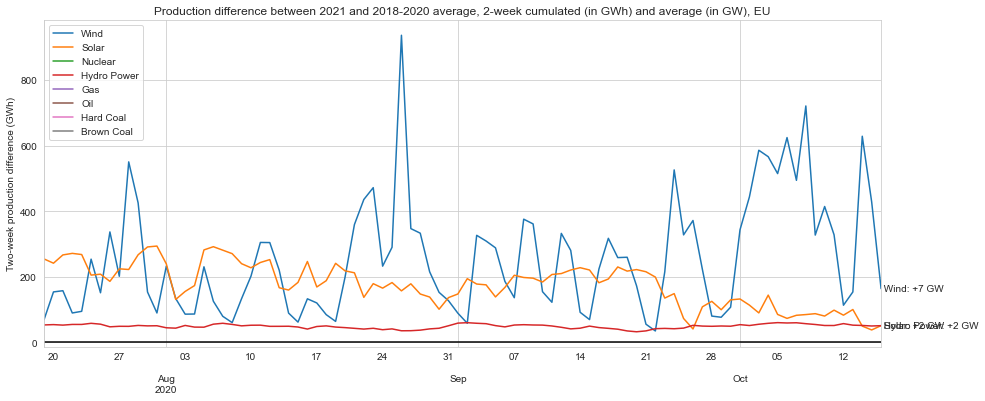

In [18]:
fig, ax = plt.subplots(figsize=(15,6), facecolor='w')
to_plot = delta.iloc[200:290][techs]

to_plot.plot(ax=ax, title='Production difference between 2021 and 2018-2020 average, 2-week cumulated (in GWh) and average (in GW), EU')

for c in to_plot:
    plt.text(to_plot.index[-1],
             to_plot[c][-1],
             f' {c}: {to_plot[c][-1]/(rolling*24):+.0f} GW',
            ha='left', va='center')
ax.set_ylabel('Two-week production difference (GWh)')
plt.axhline(1,color='k')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


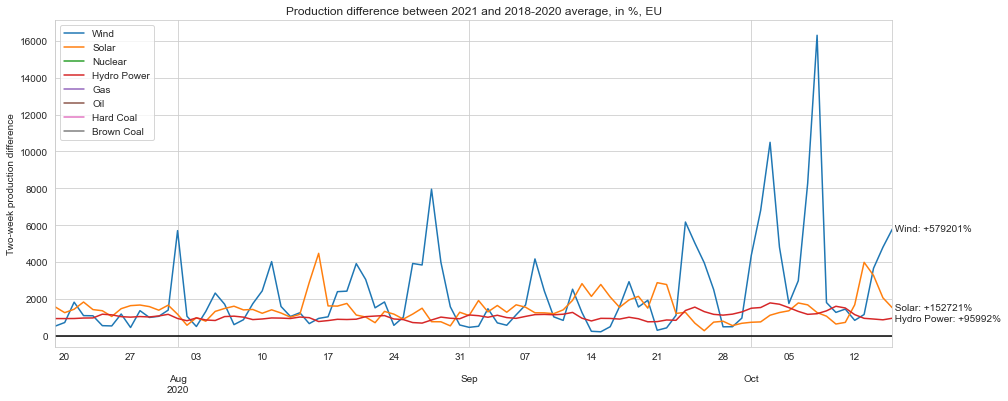

In [19]:
fig, ax = plt.subplots(figsize=(15,6), facecolor='w')
ratio.index = prod_df_2020.index
to_plot = ratio.iloc[200:290][techs]

to_plot.plot(ax=ax, title='Production difference between 2021 and 2018-2020 average, in %, EU')

for c in to_plot:
    plt.text(to_plot.index[-1],
             to_plot[c][-1],
             f' {c}: {to_plot[c][-1]*100:+.0f}%',
            ha='left', va='center')
ax.set_ylabel('Two-week production difference')
plt.axhline(0,color='k')

For country comparison, you need to collect separate data and harmonise (labels are inconsistent).

In [20]:
to_plot.index[-1]

Timestamp('2020-10-16 00:00:00')

In [21]:
all_prods = dict()

In [45]:
for country in ['fr','de','dk']:
    all_prods[country] = dict()
    for year in [
        '2017','2018',
        '2019',
        '2020','2021']: 
        all_prods[country][year], _, colors = plot_prod(country=country, year=year, display=False, load=False)

https://energy-charts.info/charts/energy/data/fr/day_2017.json
https://energy-charts.info/charts/energy/data/fr/day_2018.json
https://energy-charts.info/charts/energy/data/fr/day_2019.json
https://energy-charts.info/charts/energy/data/fr/day_2020.json
https://energy-charts.info/charts/energy/data/fr/day_2021.json
https://energy-charts.info/charts/energy/raw_data/de/day_2017.json
https://energy-charts.info/charts/energy/raw_data/de/day_2018.json
https://energy-charts.info/charts/energy/data/de/day_2019.json
https://energy-charts.info/charts/energy/data/de/day_2020.json
https://energy-charts.info/charts/energy/data/de/day_2021.json
https://energy-charts.info/charts/energy/data/dk/day_2017.json
https://energy-charts.info/charts/energy/data/dk/day_2018.json
https://energy-charts.info/charts/energy/data/dk/day_2019.json
https://energy-charts.info/charts/energy/data/dk/day_2020.json
https://energy-charts.info/charts/energy/data/dk/day_2021.json


In [58]:
all_prods['dk']['2020'][['Wind onshore','Wind offshore']].std()

Wind onshore     18.041426
Wind offshore     9.662294
dtype: float64

In [66]:
all_prods['dk']['2020'][['Wind onshore','Wind offshore']].std()/ \
all_prods['dk']['2020'][['Wind onshore','Wind offshore']].mean()

Wind onshore     0.655026
Wind offshore    0.559776
dtype: float64

In [54]:
all_prods['dk']['2020']['Wind offshore'].describe()

count    366.000000
mean      17.261012
std        9.662294
min        0.218131
25%        8.535458
50%       18.062093
75%       25.466916
max       34.525718
Name: Wind offshore, dtype: float64

In [55]:
all_prods['dk']['2020']['Wind onshore'].sum()

10080.761288400001

In [56]:
all_prods['dk']['2020']['Wind offshore'].sum()

6317.530447304348

In [31]:
columns_agg = {'Hydro pumped storage consumption': 'Hydro pumped storage consumption',
               'Import Balance': 'Import balance',
               'Biomass': 'Biomass',
               'Fossil gas': 'Fossil gas',
               'Fossil oil': 'Fossil oil',
               'Hydro pumped storage': 'Hydro pumped storage generation',
               'Hydro Run-of-River': 'Hydro run-of-river',
               'Nuclear': 'Nuclear',
               'Others': 'Others',
               'Solar': 'Solar',
               'Waste': 'Waste',
               'Wind offshore': 'Wind',
               'Wind onshore': 'Wind',
               'Pumped Storage consumption': 'Hydro pumped storage consumption',
               'Hydro Power': 'Hydro',
               'Uranium': 'Nuclear',
               'Brown Coal': 'Brown coal',
               'Hard Coal': 'Hard coal',
               'Oil': 'Fossil oil',
               'Gas': 'Fossil gas',
               'Pumped Storage generation': 'Hydro pumped storage generation',
               'Wind': 'Wind',
               'Hydro Pumped Storage consumption': 'Hydro pumped storage consumption',
               'Fossil Brown Coal': 'Brown coal',
               'Fossil Hard Coal': 'Hard coal',
               'Fossil Oil': 'Fossil oil',
               'Fossil Gas': 'Fossil gas',
               'Hydro Pumped Storage generation': 'Hydro pumped storage generation',
               'Hydro Water Reservoir': 'Hydro',
               'Hydro water reservoir': 'Hydro',
               'Fossil hard coal': 'Hard coal'}

In [32]:
raw_agg = pd.concat([pd.concat(p, axis=0) for p in all_prods.values()], keys=all_prods.keys())
prod_agg = raw_agg.groupby(columns_agg, axis=1).sum()
prod_agg.index.names=('country','year','date')
prod_agg = prod_agg.reset_index()
prod_agg['day of year'] = prod_agg['date'].dt.dayofyear
prod_agg = prod_agg.drop('date',axis=1)
# prod_agg = prod_agg.drop('date')
prod_agg = prod_agg.set_index(['day of year','year','country']).unstack(['year','country'])
prod_agg = prod_agg.reorder_levels(order=[2,1,0],axis=1)
try:
    prod_agg['de','2019']*=1000
except:
    pass

In [33]:
prod_agg[prod_agg==0] = np.nan

In [34]:
countries = prod_agg.columns.levels[0]
countries

Index(['eu'], dtype='object', name='country')

In [39]:
colors =  [ (r/255,g/255,b/255) for r,g,b in
           [
#             (169,169,169), (128,128,128), (105,105,105), (82,82,82),
             (102,102,255),(51,51,255),(0,0,255),
             (51,255,153),(0,255,128),(0,204,102),
            (255,128,0), (255,153,51) , (255,178,102),
               (238, 238, 105), (181, 179, 81), (157, 155, 71),
            (211, 52, 93), (231, 26, 47), (250, 0, 0),
           ]]


In [40]:
prod_agg.columns.levels

FrozenList([['eu'], ['2017', '2018', '2019', '2020', '2021'], ['Biomass', 'Fossil gas', 'Fossil oil', 'Hard coal', 'Hydro', 'Hydro pumped storage consumption', 'Hydro pumped storage generation', 'Hydro run-of-river', 'Import balance', 'Nuclear', 'Others', 'Solar', 'Waste', 'Wind']])

Text(0, 0.5, 'GWh')

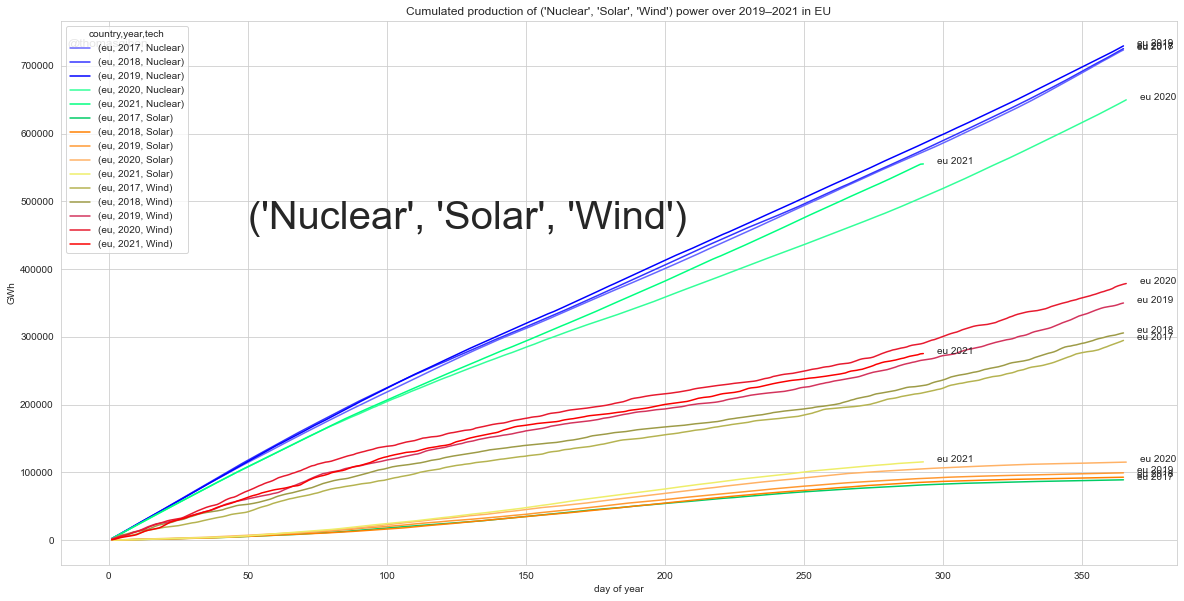

In [44]:
tech = ('Nuclear',
        'Solar',
        'Wind')

cumul = prod_agg.loc[:,([c for c in countries if c not in ['pl']],slice(None),tech)].cumsum(skipna=True)
cumul.columns.names = ['country','year','tech']
# cumul = cumul.groupby('year', axis=1).sum(min_count=1)
fig, ax = plt.subplots(figsize=(20,10), facecolor='w')

cumul.plot(color=colors, ax=ax)

for c in cumul.columns:
    last_v = cumul[c].last_valid_index()
    
    if last_v != None:

        if c[1] == '2021':
            v_2020 = cumul.loc[last_v,(c[0], '2020', tech)]
            gap = cumul[c][last_v] - v_2020 
            delta = 100 * (cumul[c][last_v]/v_2020 - 1)
#             label = f'{c[0]} {c[1]}, {cumul[c][last_v]/1000:0.0f} TWh, {delta:+0.1f} %/2020'
            label = f'{c[0]} {c[1]}'
        else:
            label = f'{c[0]} {c[1]}'

        plt.text(cumul[c].last_valid_index() + 5,
                 cumul[c][cumul[c].last_valid_index()],
                 label)
        
plt.text(50, ax.get_ylim()[1] * .6, tech, fontsize=40)
plt.text(-15, ax.get_ylim()[1] * .95, '@thomasgibon', fontsize=12, color='gray')
plt.title(f'Cumulated production of {tech} power over 2019–2021 in EU')
ax.set_ylabel('GWh')
# ax.get_legend().remove()

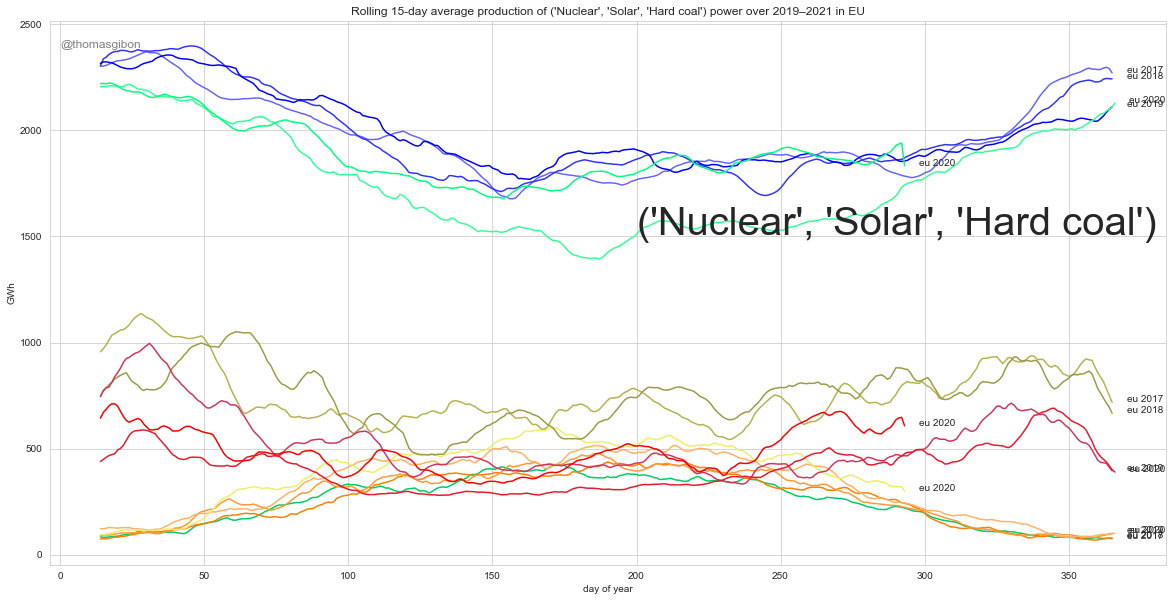

In [42]:
roll = prod_agg.loc[:,([c for c in countries if c not in ['pl']],slice(None),tech)].rolling(14).mean()

fig, ax = plt.subplots(figsize=(20,10), facecolor='w')

roll.plot(color=colors, ax=ax)

for c in roll.columns:
    last_v = roll[c].last_valid_index()
    
    if last_v != None:

        if c[1] == '2021':
            v_2020 = roll.loc[last_v,(c[0], '2020', tech)]
            gap = roll[c][last_v] - v_2020 
            delta = 100 * (roll[c][last_v]/v_2020 - 1)
#             label = f'{c[0]} {c[1]}, {roll[c][last_v]:0.0f} GWh, {delta:+0.1f} %/2020'
        else:
            label = f'{c[0]} {c[1]}'

        plt.text(roll[c].last_valid_index() + 5,
                 roll[c][roll[c].last_valid_index()],
                 label)
plt.text(200, ax.get_ylim()[1] * .6, tech, fontsize=40)
plt.text(0, ax.get_ylim()[1] * .95, '@thomasgibon', fontsize=12, color='gray')
plt.title(f'Rolling 15-day average production of {tech} power over 2019–2021 in EU')
ax.set_ylabel('GWh')
ax.get_legend().remove()

<AxesSubplot:xlabel='day of year'>

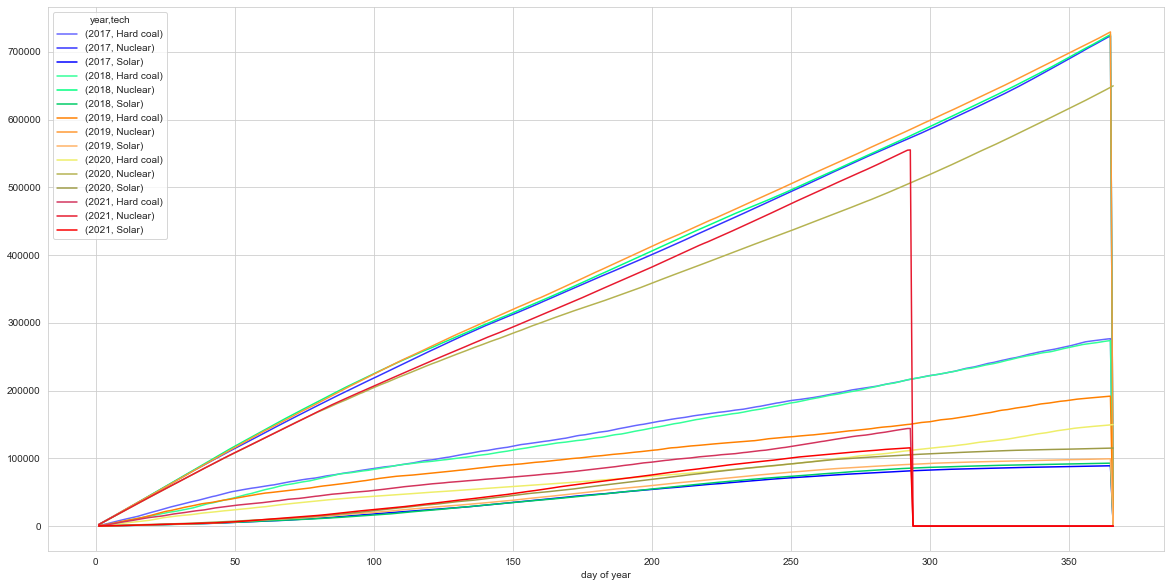

In [43]:
cumul.groupby(['year','tech'],axis=1).sum()

fig, ax = plt.subplots(figsize=(20,10), facecolor='w')
cumul.groupby(['year','tech'],axis=1).sum().plot(color=colors, ax=ax)


# Correlations

In [36]:
columns_agg = {'Hydro pumped storage consumption': 'Renewable firm',
               'Import Balance': 'Import balance',
               'Biomass': 'Renewable firm',
               'Fossil gas': 'Fossil',
               'Fossil oil': 'Fossil',
               'Hydro pumped storage': 'Renewable firm',
               'Hydro Run-of-River': 'Renewable firm',
               'Nuclear': 'Nuclear',
               'Others': 'Others',
               'Solar': 'Renewable variable',
               'Waste': 'Renewable firm',
               'Wind offshore': 'Renewable variable',
               'Wind onshore': 'Renewable variable',
               'Pumped Storage consumption': 'Renewable firm',
               'Hydro Power': 'Renewable firm',
               'Uranium': 'Nuclear',
               'Brown Coal': 'Fossil',
               'Hard Coal': 'Fossil',
               'Oil': 'Fossil',
               'Gas': 'Fossil',
               'Pumped Storage generation': 'Renewable firm',
               'Wind': 'Renewable variable',
               'Hydro Pumped Storage consumption': 'Renewable firm',
               'Fossil Brown Coal': 'Fossil',
               'Fossil Hard Coal': 'Fossil',
               'Fossil Oil': 'Fossil',
               'Fossil Gas': 'Fossil gas',
               'Hydro Pumped Storage generation': 'Renewable firm',
               'Hydro Water Reservoir': 'Renewable firm',
               'Hydro water reservoir': 'Renewable firm',
               'Fossil hard coal': 'Fossil'}

In [37]:
prod = pd.concat([prod_df_2019,prod_df_2020,prod_df_2021])
prod_ag = prod.groupby(columns_agg, axis=1).sum()

In [38]:
ratio.dropna()

,Biomass,Brown Coal,Fossil Brown Coal,Fossil Gas,Fossil Hard Coal,Fossil Oil,Gas,Hard Coal,Hydro Power,Hydro Pumped Storage consumption,Hydro Pumped Storage generation,Import Balance,Nuclear,Oil,Others,Solar,Uranium,Wind


In [ ]:
x = 'Fossil gas'
y = 'Wind onshore'

j = sns.jointplot(data=prod_df_2021.dropna(),
              x=x,
              y=y,
              kind='kde',
              fill=True,
#               cbar=True,
                 )

r, p = stats.pearsonr(prod_df_2021.dropna()[x], prod_df_2021.dropna()[y])
print(r,p)

In [ ]:
x = 'Nuclear'
y = 'Renewable variable'

j = sns.jointplot(data=prod_ag,
                  space=0,
              x=x,
              y=y,
              kind='kde',
              fill=True,
              cbar=True,
                 )

r, p = stats.pearsonr(prod_ag[x], prod_ag[y])
print(r,p)

In [ ]:
x = 'Nuclear'
y = 'Fossil'

j = sns.jointplot(data=prod_ag,
              x=x,
              y=y,
              kind='kde',
              fill=True,
              cbar=True)

r, p = stats.pearsonr(prod_ag[x], prod_ag[y])
print(r,p)